In [85]:
import random 
import string

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def generate_random_palindrome(length):
    ret = ""
    half_ret = generate_random_string(length//2)
    if(length % 2 == 1):
        ret = half_ret + "a" + (half_ret[::-1])
    else:
        ret = half_ret + (half_ret[::-1])
    return ret

def generate_n_spaced_palindromes(n):
    length = random.randint(1, (3000 - 2 * n) //n)
    ret = ""
    for _ in range(n):
        sub_palindrome = generate_random_palindrome(length)
        ret += sub_palindrome
        ret += "qk" # seperator
    return ret

def generate_test_case(n):
    t = 2
    strings = []
    strings.append(generate_random_string(n))
    strings.append(generate_n_spaced_palindromes(n//5))
    
    return t, strings

In [86]:
import subprocess
import time
t = []
strings = []
for i in range(1, 7):
    new_t, new_string = generate_test_case(i * 500)
    t.append(new_t)
    strings.append(new_string)
generated_input = []
time_difs_c = []
for i in range(1, 7):
    generated_input = f"{t[i-1]}\n" + "\n".join(strings[i-1])
    command = "./cpp/MSUBSTR"
    time_difs_c.append([])
    for j in range (100):
        starting_time = time.time_ns()
        result = subprocess.run(command, input=generated_input, text=True, capture_output=True)
        end_time = time.time_ns()
        time_dif = end_time - starting_time
        time_dif_ns = time_dif
        time_difs_c[i-1].append(time_dif_ns)

In [90]:
time_difs_hs = []
for i in range(1, 7):
    generated_input = f"{t[i-1]}\n" + "\n".join(strings[i-1])
    command = "msubstr"
    time_difs_hs.append([])
    for j in range (100):
        starting_time = time.time_ns()
        result = subprocess.run(command, input=generated_input, text=True, capture_output=True)
        end_time = time.time_ns()
        time_dif = end_time - starting_time
        time_dif_ns = time_dif
        time_difs_hs[i-1].append(time_dif_ns)

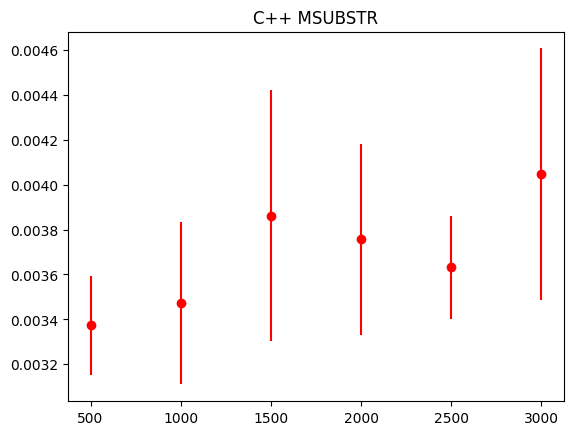

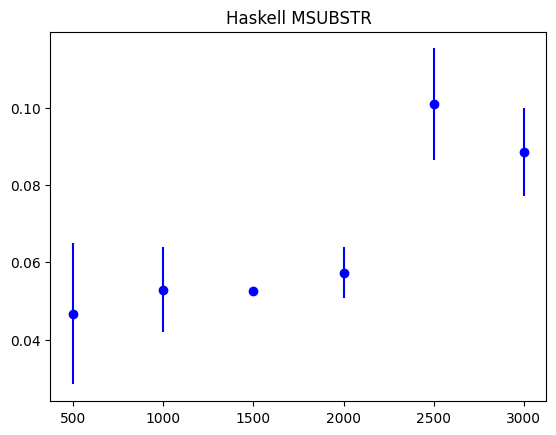

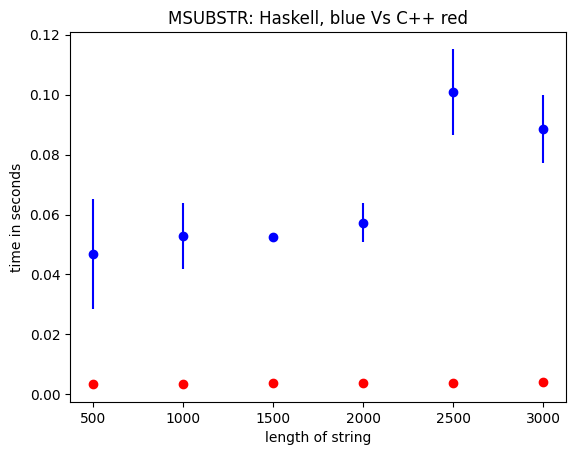

In [88]:
import numpy as np
import matplotlib.pyplot as plt
xs = [500, 1000, 1500, 2000, 2500, 3000]
mean_c, std_c = [], []
mean_hs, std_hs = [], []

for i in range (6):
    mean_c.append(np.mean(time_difs_c[i])/1e9)
    std_c.append(np.std(time_difs_c[i])/1e9)
    mean_hs.append(np.mean(time_difs_hs[i])/1e9)
    std_hs.append(np.std(time_difs_hs[i])/1e9)

plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r")
plt.title("C++ MSUBSTR")
plt.show()
plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b")
plt.title("Haskell MSUBSTR")
plt.show()
plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b")
plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r")
plt.title("MSUBSTR: Haskell, blue Vs C++ red")
plt.ylabel("time in seconds")
plt.xlabel("length of string")
plt.show()
